# <font color='#00878A'>Ciência dos Dados</font>
## Projeto 3
Amanda Carmo    | 
Lucio Hallage    |
Nicole Costa    |
Vitor Miada

In [1]:
import sklearn 

In [2]:
sklearn.__version__

'0.21.3'

### Objetivo
- Conduzir análise de dados com grau elevado de autonomia utilizando técnicas como: regressão linear, regression tree, random forest regression, multinomial naive bayes, regressão logística, decision tree, random forest e clusterização (k-means).


Em nosso projeto iremos analizar a base de dados do jogo League of Legends, para fazer a previsão de vitórias de uma partida baseando-se em um time.
.# ARRUMAR AQUI EM CIMA

Para o nosso projeto utilizamos técnicas como _random forest_, _regressão logística_ e _decision tree_ para criar nosso classificador.

## O que é League of Legends: ##

League of Legends, é um jogo online MOBA (Multiplayer Online Battle Arena) competitivo, no qual dez jogadores, divididos em dois times,  batalham com diferentes personagens que exercem inumeras funções durante a partida. O jogo que permanece em constante atualização, oferece competitividade e muita diversão para todos os jogadores de diferentes níveis de habilidade.


## Como é o jogo :##


No League of Legends, o objetivo do jogo é destruir o néxus (o núcleo) da base inimiga. Para isso, serão 10 jogadores divididos em 2 times, o azul e o vermelho, que se enfrentarão num campo de batalha. Para cada jogador, existe uma função principal, na qual pode ser dividida em 5 funções: o Topo (Top-lane), o Caçador (Jungler), o Meio (Mid-lane), o Atirador (ADC) e o Suporte (SUP). Para saber qual posição cada competidor exercerá, serão escolhidos dentre dos 150 campeões (personagens), apenas 5 para cada time, no qual cada jogador selecionará um para jogar. Cada personagem escolhido, tem seu estilo, e portanto sua função dentre as 5 antes mencionadas.


## Data-Set ##

O dataset é constituido de apenas partidas profissionais entre 2015 a 2018 de todos os servidores. O documento, mostra principalmente, quais campeões cada time selecionou, por exemplo, o "redTopChamp", significa qual campeão o jogador do time vermelho jogou; quais foram os jogadores que jogaram a partida, por exemplo, o "blueJungle", que significa quem jogou como Caçador no time azul; qual time jogou e se ele venceu (1) ou perdeu (0), por exemplo "blueTeamTag", representa a sigla do time azul, e "bResult" igual a 0, significa que ele perdeu. Outros dados como ano, liga, não são relevantes, pois como o objetivo do projeto é estimar quem vai ganhar, quando ocorreu e onde ocorreu não são necessários.

## Preparando o ambiente no jupyter:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings

## <font color='red'>colocar o porque dessa base de dados</font>


Lendo a base de dados:

In [4]:
dados = pd.read_excel('matchinfo-treinamento.xlsx')
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [5]:
dados.head(4)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2016,Spring,Season,TSM,0,1,REN,30,Hauntzer,...,Graves,Crumbz,Gragas,Ninja,Lissandra,Freeze,Caitlyn,Hakuho,Bard,http://matchhistory.na.leagueoflegends.com/en/...
1,TCL,2015,Spring,Season,BJK,1,0,NR1,43,Thaldrin,...,Maokai,Decagon Moon,RekSai,LEYL U NEHAR,Ahri,Revanche,Sivir,Swanepoel,Janna,http://matchhistory.tr.leagueoflegends.com/tr/...
2,NALCS,2017,Spring,Season,NV,1,0,C9,38,Seraph,...,Nautilus,Contractz,LeeSin,Jensen,Cassiopeia,Sneaky,Ezreal,Smoothie,Malzahar,http://matchhistory.na.leagueoflegends.com/en/...
3,IEM,2016,Spring,International,OG,0,1,TSM,33,Soaz,...,Fiora,Svenskeren,LeeSin,Bjergsen,TwistedFate,Doublelift,Ezreal,Yellowstar,Alistar,http://matchhistory.euw.leagueoflegends.com/en...


In [6]:
dados_testes.head(2)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2018,Spring,Promotion,GCU,1,0,P1,35,Solo,...,Kled,MikeYeung,Elise,Ryu,Lucian,Arrow,Tristana,Xpecial,Taric,http://matchhistory.na.leagueoflegends.com/en/...
1,CBLoL,2017,Spring,Season,CNB,1,0,KBM,45,Lep,...,Nautilus,Danagorn,RekSai,Vash,Jayce,TheFoxz,Ziggs,Riyev,MissFortune,http://matchhistory.br.leagueoflegends.com/pt/...


In [7]:
dados.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address'],
      dtype='object')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 30 columns):
League              6499 non-null object
Year                6499 non-null int64
Season              6499 non-null object
Type                6499 non-null object
blueTeamTag         6466 non-null object
bResult             6499 non-null int64
rResult             6499 non-null int64
redTeamTag          6467 non-null object
gamelength          6499 non-null int64
blueTop             6467 non-null object
blueTopChamp        6499 non-null object
blueJungle          6476 non-null object
blueJungleChamp     6499 non-null object
blueMiddle          6467 non-null object
blueMiddleChamp     6499 non-null object
blueADC             6467 non-null object
blueADCChamp        6499 non-null object
blueSupport         6467 non-null object
blueSupportChamp    6499 non-null object
redTop              6467 non-null object
redTopChamp         6499 non-null object
redJungle           6478 non-null ob

In [9]:
dados_testes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 30 columns):
League              1121 non-null object
Year                1121 non-null int64
Season              1121 non-null object
Type                1121 non-null object
blueTeamTag         1116 non-null object
bResult             1121 non-null int64
rResult             1121 non-null int64
redTeamTag          1116 non-null object
gamelength          1121 non-null int64
blueTop             1116 non-null object
blueTopChamp        1121 non-null object
blueJungle          1116 non-null object
blueJungleChamp     1121 non-null object
blueMiddle          1116 non-null object
blueMiddleChamp     1121 non-null object
blueADC             1116 non-null object
blueADCChamp        1121 non-null object
blueSupport         1116 non-null object
blueSupportChamp    1121 non-null object
redTop              1116 non-null object
redTopChamp         1121 non-null object
redJungle           1118 non-null ob

In [10]:
team={}
for i in dados.blueTeamTag:
    team[i]=0
for i in dados.redTeamTag:
    team[i]=0
for k,v in team.items():
    wins=len(dados[(dados.blueTeamTag==k) & (dados.bResult==1)])+len(dados[(dados.redTeamTag==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTeamTag==k])+ len(dados[dados.redTeamTag==k])
    if matchs!=0:
        team[k]=wins/matchs
#print (team)

In [11]:
top = {}
for i in dados.blueTopChamp:
    top[i]=0
for i in dados.redTopChamp:
    top[i]=0
for k,v in  top.items():
    wins=len(dados[(dados.blueTopChamp==k) & (dados.bResult==1)])+len(dados[(dados.redTopChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTopChamp==k])+ len(dados[dados.redTopChamp==k])      
    if matchs!=0:
        top[k]=wins/matchs
#print(top)

In [12]:
jg = {}
for i in dados.blueJungleChamp:
    jg[i]=0
for i in dados.redJungleChamp:
    jg[i]=0
for k,v in  jg.items():
    wins=len(dados[(dados.blueJungleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redJungleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungleChamp==k])+ len(dados[dados.redJungleChamp==k])      
    if matchs!=0:
        jg[k]=wins/matchs
print(jg)

{'Elise': 0.5022727272727273, 'JarvanIV': 0.488013698630137, 'Nidalee': 0.5273010920436817, 'RekSai': 0.4894894894894895, 'Gragas': 0.5360536612632756, 'Hecarim': 0.4755244755244755, 'Kindred': 0.4579710144927536, 'Ivern': 0.5358851674641149, 'Khazix': 0.5119726339794755, 'Graves': 0.46424870466321244, 'LeeSin': 0.47002398081534774, 'Warwick': 0.5348837209302325, 'Evelynn': 0.4189189189189189, 'Zac': 0.5896414342629482, 'Olaf': 0.48880597014925375, 'Pantheon': 0.47619047619047616, 'Sejuani': 0.5186813186813187, 'Rengar': 0.52734375, 'Vi': 0.5416666666666666, 'Draven': 1.0, 'Rumble': 0.4411764705882353, 'Nunu': 0.49586776859504134, 'Maokai': 0.464, 'Rammus': 0.7777777777777778, 'Nocturne': 0.52, 'Ekko': 0.4666666666666667, 'Kayn': 0.46153846153846156, 'Sion': 0.3333333333333333, 'Syndra': 0.0, 'Shyvana': 0.30434782608695654, 'Chogath': 0.48717948717948717, 'Amumu': 0.2857142857142857, 'Nautilus': 0.3333333333333333, 'Udyr': 0.4375, 'Ezreal': 0.0, 'Skarner': 0.5, 'Trundle': 0.4, 'Bard': 

In [13]:
mid = {}
for i in dados.blueMiddleChamp:
    mid[i]=0
for i in dados.redMiddleChamp:
    mid[i]=0
for k,v in  mid.items():
    wins=len(dados[(dados.blueMiddleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redMiddleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddleChamp==k])+ len(dados[dados.redMiddleChamp==k])      
    if matchs!=0:
        mid[k]=wins/matchs
#print(mid)

In [14]:
adc = {}
for i in dados.blueADCChamp:
    adc[i]=0
for i in dados.redADCChamp:
    adc[i]=0
for k,v in  adc.items():
    wins=len(dados[(dados.blueADCChamp==k) & (dados.bResult==1)])+len(dados[(dados.redADCChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADCChamp==k])+ len(dados[dados.redADCChamp==k])      
    if matchs!=0:
        adc[k]=wins/matchs
print(adc)

{'Jhin': 0.51010101010101, 'Graves': 0.47093023255813954, 'Ziggs': 0.46511627906976744, 'Lucian': 0.47333333333333333, 'Kalista': 0.5429087624209575, 'Caitlyn': 0.49742002063983487, 'MissFortune': 0.4189189189189189, 'Sivir': 0.5239417071478141, 'Jinx': 0.4811320754716981, 'Ezreal': 0.4820936639118457, 'Ashe': 0.5119940029985007, 'Xayah': 0.5067264573991032, 'Tristana': 0.4986149584487535, 'Varus': 0.4826666666666667, 'Twitch': 0.5570776255707762, 'KogMaw': 0.45788336933045354, 'Vayne': 0.4857142857142857, 'Heimerdinger': 1.0, 'Corki': 0.48604992657856094, 'Draven': 0.5283018867924528, 'Kennen': 0.46, 'Janna': 0.0, 'Urgot': 0.5535714285714286, 'Mordekaiser': 0.8333333333333334, 'Irelia': 1.0, 'Quinn': 0.5, 'Viktor': 0.0, 'Blitzcrank': 0.0, 'Alistar': 1.0, 'Karma': 0.0, 'Kindred': 0.5, 'Lulu': 0.0, 'Nunu': 1.0, 'Thresh': 0.0, 'Karthus': 1.0, 'Jayce': 0.0, 'Teemo': 0.0, 'Kled': 0.0, 'Taliyah': 0.0}


In [15]:
sup = {}
for i in dados.blueSupportChamp:
    sup[i]=0
for i in dados.redSupportChamp:
    sup[i]=0
for k,v in  sup.items():
    wins=len(dados[(dados.blueSupportChamp==k) & (dados.bResult==1)])+len(dados[(dados.redSupportChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupportChamp==k])+ len(dados[dados.redSupportChamp==k])      
    if matchs!=0:
        sup[k]=wins/matchs
print(sup)

{'Braum': 0.47768595041322315, 'Annie': 0.5474137931034483, 'Lulu': 0.45648854961832064, 'TahmKench': 0.5105008077544426, 'Alistar': 0.4869753979739508, 'Janna': 0.5380507343124166, 'Karma': 0.4694560669456067, 'Thresh': 0.526060606060606, 'Blitzcrank': 0.5590062111801242, 'Nautilus': 0.4697986577181208, 'Nami': 0.46037735849056605, 'Morgana': 0.5300925925925926, 'Taric': 0.5170940170940171, 'Leona': 0.44285714285714284, 'Malzahar': 0.581039755351682, 'Zyra': 0.48450244698205547, 'Bard': 0.5338078291814946, 'LeeSin': 0.5, 'Trundle': 0.5331632653061225, 'Shen': 0.59375, 'Kennen': 0.5454545454545454, 'Rakan': 0.5062111801242236, 'Zilean': 0.3888888888888889, 'MissFortune': 0.5158730158730159, 'Soraka': 0.512, 'Poppy': 0.4, 'Ashe': 0.6666666666666666, 'Brand': 0.5102040816326531, 'Kayle': 0.0, 'Lissandra': 0.2, 'Sona': 0.3902439024390244, 'DrMundo': 0.0, 'Veigar': 0.625, 'Maokai': 0.42857142857142855, 'Irelia': 0.0, 'Zac': 1.0, 'Fiddlesticks': 0.2, 'Malphite': 0.5, 'Camille': 0.5, 'Galio'

In [16]:
top_player = {}
for i in dados.blueTop:
    top_player[i]=0
for i in dados.redTop:
    top_player[i]=0
for k,v in  top_player.items():
    wins=len(dados[(dados.blueTop==k) & (dados.bResult==1)])+len(dados[(dados.redTop==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTop==k])+ len(dados[dados.redTop==k])      
    if matchs!=0:
        top_player[k]=wins/matchs
#print(top_player)

In [17]:
jg_player = {}
for i in dados.blueJungle:
    jg_player[i]=0
for i in dados.redJungle:
    jg_player[i]=0
for k,v in  jg_player.items():
    wins=len(dados[(dados.blueJungle==k) & (dados.bResult==1)])+len(dados[(dados.redJungle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungle==k])+ len(dados[dados.redJungle==k])      
    if matchs!=0:
        jg_player[k]=wins/matchs
#print(jg_player)

In [18]:
mid_player = {}
for i in dados.blueMiddle:
    mid_player[i]=0
for i in dados.redMiddle:
    mid_player[i]=0
for k,v in  mid_player.items():
    wins=len(dados[(dados.blueMiddle==k) & (dados.bResult==1)])+len(dados[(dados.redMiddle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddle==k])+ len(dados[dados.redMiddle==k])      
    if matchs!=0:
        mid_player[k]=wins/matchs
#print(mid_player)

In [19]:
adc_player = {}
for i in dados.blueADC:
    adc_player[i]=0
for i in dados.redADC:
    adc_player[i]=0
for k,v in  adc_player.items():
    wins=len(dados[(dados.blueADC==k) & (dados.bResult==1)])+len(dados[(dados.redADC==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADC==k])+ len(dados[dados.redADC==k])      
    if matchs!=0:
        adc_player[k]=wins/matchs
#print(adc_player)

In [20]:
sup_player = {}
for i in dados.blueSupport:
    sup_player[i]=0
for i in dados.redSupport:
    sup_player[i]=0
for k,v in  sup_player.items():
    wins=len(dados[(dados.blueSupport==k) & (dados.bResult==1)])+len(dados[(dados.redSupport==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupport==k])+ len(dados[dados.redSupport==k])      
    if matchs!=0:
        sup_player[k]=wins/matchs
#print(sup_player)

Naive baiyes



In [21]:
#dicionarios juntos
alls={}

for k,v in team.items():
    alls[k]=v

for k,v in top.items():
    alls[k]=v

for k,v in mid.items():
    if k not in mid.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid[k])/2

for k,v in jg.items():
    if k not in jg.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg[k])/2

for k,v in adc.items():
    if k not in adc.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc[k])/2

for k,v in sup.items():
    if k not in sup.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup[k])/2

for k,v in top_player.items():
    if k not in top_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+top_player[k])/2

for k,v in jg_player.items():
    if k not in jg_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg_player[k])/2

for k,v in mid_player.items():
    if k not in mid_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid_player[k])/2

for k,v in adc_player.items():
    if k not in adc_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc_player[k])/2

for k,v in sup_player.items():
    if k not in sup_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup_player[k])/2
    
#print(alls)
len(alls)

1975

___

## <font color='#00878A'> Classificador - random forest</font>

### Unindo os dados dos times

Descobrir a acurácia

In [22]:
columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']


In [23]:
dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

In [24]:
dados_concat = pd.concat([dados_b, dados_r]).dropna()
dados_concat.head()

,Result,TeamTag,Top,TopChamp,Jungle,JungleChamp,Middle,MiddleChamp,ADC,ADCChamp,Support,SupportChamp
0,0,TSM,Hauntzer,Trundle,Svenskeren,Elise,Bjergsen,Lulu,Doublelift,Jhin,Yellowstar,Braum
1,1,BJK,Thaldrin,Gnar,Theokoles,JarvanIV,Energy,Xerath,Nardeus,Graves,Dumbledoge,Annie
2,1,NV,Seraph,Maokai,LirA,Nidalee,Ninja,Jayce,Apollo,Ziggs,Hakuho,Lulu
3,0,OG,Soaz,Trundle,Amazing,Elise,PowerOfEvil,Talon,Zven,Lucian,Mithy,Braum
4,1,SIN,Dhokla,Rumble,Juves,RekSai,ry0ma,Zed,FBI,Kalista,Rogue,Braum


In [25]:
y_train = dados_concat['Result']
x_train = dados_concat.drop(columns='Result')

In [26]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

In [27]:
x_train_encoded

<12933x2306 sparse matrix of type '<class 'numpy.float64'>'
	with 142263 stored elements in Compressed Sparse Row format>

In [28]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train_encoded, y_train)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
model.score(x_train_encoded, y_train)

0.9798190675017397

#### <font color='#00878A'>Testes</font>

In [30]:
dados_bt = dados_testes[columnsb]
dados_bt.columns = columns
dados_rt = dados_testes[columnsr]
dados_rt.columns = columns

In [31]:
teste_concat = pd.concat([dados_bt, dados_rt]).dropna()
teste_concat.head()

,Result,TeamTag,Top,TopChamp,Jungle,JungleChamp,Middle,MiddleChamp,ADC,ADCChamp,Support,SupportChamp
0,1,GCU,Solo,Shen,Santorin,JarvanIV,Fly,Orianna,Rikara,Sivir,Whyin,Thresh
1,1,CNB,Lep,Maokai,Minerva,Graves,Tinowns,Syndra,pbO,Jhin,Woswos,Malzahar
2,0,MSE,Ninuo,Maokai,Wulala,Gragas,M1ssion,Vladimir,CorGi,Sivir,Kaiwing,Braum
3,1,PDS,jer0m,Gnar,RafaL0L,Gragas,Icytower,Vladimir,xpng,Varus,Choisix,Thresh
4,0,JAG,TrAce,TahmKench,Winged,Elise,Kuzan,Cassiopeia,Pilot,Lucian,Chei,Alistar


In [32]:
y_test = teste_concat['Result']
x_test = teste_concat.drop(columns='Result')

In [33]:
x_test_encoded = encoder.transform(x_test)

In [34]:
y_predict = model.predict(x_test_encoded)

In [35]:
y_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
acc = accuracy_score(y_test, y_predict)

In [37]:
acc

0.5698924731182796

________

### Considerando os dois times

#### Segunda iteração - random forest

In [38]:
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])

In [48]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

In [49]:
x_train_encoded

<6499x10952 sparse matrix of type '<class 'numpy.float64'>'
	with 181972 stored elements in Compressed Sparse Row format>

In [50]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train_encoded, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
model.score(x_train_encoded, y_train)

1.0

#### <font color='#00878A'>Testes</font>

In [52]:
dados_testes.dropna(inplace=True)

In [53]:
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

In [54]:
x_test.head()

,League,Year,Season,Type,blueTeamTag,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2018,Spring,Promotion,GCU,P1,35,Solo,Shen,Santorin,...,Kled,MikeYeung,Elise,Ryu,Lucian,Arrow,Tristana,Xpecial,Taric,http://matchhistory.na.leagueoflegends.com/en/...
1,CBLoL,2017,Spring,Season,CNB,KBM,45,Lep,Maokai,Minerva,...,Nautilus,Danagorn,RekSai,Vash,Jayce,TheFoxz,Ziggs,Riyev,MissFortune,http://matchhistory.br.leagueoflegends.com/pt/...
2,LMS,2016,Summer,Season,MSE,HKE,37,Ninuo,Maokai,Wulala,...,Shen,WIND,Graves,Gear,Kassadin,Raison,Kalista,Olleh,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
3,LLN,2017,Summer,Season,PDS,GG,49,jer0m,Gnar,RafaL0L,...,Renekton,LiquidDiego,LeeSin,Lezaford,Kassadin,N1njA,Caitlyn,NerzhuL,TahmKench,http://matchhistory.lan.leagueoflegends.com/es...
4,LCK,2016,Spring,Season,JAG,AFs,40,TrAce,TahmKench,Winged,...,Rumble,LirA,RekSai,Mickey,Corki,Sangyoon,Kalista,SnowFlower,Thresh,http://matchhistory.na.leagueoflegends.com/en/...


In [58]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [59]:
y_predict = model.predict(x_test_encoded)

In [60]:
model.score(x_test_encoded, y_test)

0.6514336917562724

In [61]:
y_predict

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [62]:
acc = accuracy_score(y_test, y_predict)

In [63]:
acc

0.6514336917562724

### Porque a análise com os dados não concatenados funcionou melhor que os dados não concatenados?

A análise com os dados do resultado concatenados não levavam em conta o adversário da partida, já com os dados não concatenados temos uma análise mais precisa uma vez que podemos prever o resultado baseado no desmpenho do time e do time o qual eles estão jogando contra.

In [64]:
matrix = confusion_matrix(y_test, y_predict, labels=None, sample_weight=None)

In [65]:
matrix

array([[261, 241],
       [148, 466]], dtype=int64)

In [66]:
dados_testes['bPredict'] = y_predict

In [67]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [68]:
y_predict_proba

array([[0.53, 0.47],
       [0.34, 0.66],
       [0.6 , 0.4 ],
       ...,
       [0.44, 0.56],
       [0.58, 0.42],
       [0.4 , 0.6 ]])

In [69]:
dados_testes['bPredictProba'] = y_predict_proba[:,1]

In [70]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(30)

,blueTeamTag,redTeamTag,bPredictProba,bResult
869,CJ,ROX,0.07,0
941,GG,LYN,0.10,0
548,MM,S04,0.10,1
726,FB,FW,0.10,0
400,JTH,LYN,0.10,0
828,REN,IMT,0.11,0
886,P1,IMT,0.11,1
221,NRG,IMT,0.11,1
631,GG,LYN,0.12,0
16,HKE,FW,0.13,0


In [71]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

In [72]:
comp_acertos['bPredictProba'].value_counts().head()

0.71    22
0.68    21
0.74    19
0.66    19
0.65    18
Name: bPredictProba, dtype: int64

In [73]:
comp_erros['blueTeamTag'].value_counts().head()

CLG    11
C9     10
AFs    10
SKT     9
JAG     9
Name: blueTeamTag, dtype: int64

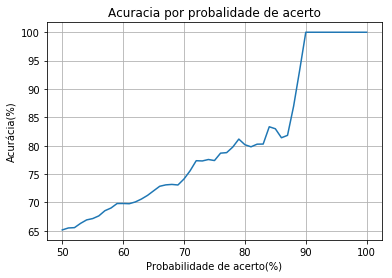

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 93.33333333333333,
 86.95652173913044,
 81.81818181818181,
 81.3953488372093,
 82.97872340425532,
 83.33333333333333,
 80.28169014084507,
 80.26315789473684,
 79.79797979797979,
 80.16528925619835,
 81.15942028985508,
 79.74683544303798,
 78.77094972067039,
 78.68020304568527,
 77.37556561085972,
 77.55905511811024,
 77.30496453900709,
 77.3462783171521,
 75.57471264367815,
 74.13333333333334,
 73.06733167082294,
 73.1651376146789,
 73.08533916849015,
 72.83702213279678,
 72.03703703703704,
 71.23050259965338,
 70.58823529411765,
 70.07751937984496,
 69.76401179941003,
 69.80337078651685,
 69.79591836734694,
 69.00510204081633,
 68.52976913730255,
 67.61687571265678,
 67.1444321940463,
 66.91022964509395,
 66.29778672032194,
 65.54379210779595,
 65.48837209302326,
 65.14336917562724]

In [101]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Probabilidade de acerto(%)')
plt.title('Acuracia por probalidade de acerto')
plt.grid()
# plt.axis(0.5)
plt.show()
acc    

___

## <font color='#00878A'>Logistic regression</font>

In [75]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [76]:
y_train2 = dados['bResult']
x_train2 = dados.drop(columns = ['bResult', 'rResult'])

In [77]:
encoder2 = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

In [78]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [79]:
model2.fit(x_train2_encoded, y_train2)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
model2.score(x_train_encoded,y_train)

0.9067548853669796

In [98]:
y_train.value_counts(True)

1    0.543007
0    0.456993
Name: bResult, dtype: float64

#### <font color='#00878A'>Testes</font>

In [81]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')
dados_testes.dropna(inplace=True)

In [82]:
y_test2 = dados_testes['bResult']
x_test2 = dados_testes.drop(columns=['bResult','rResult'])

In [84]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [85]:
y_pred2 = model2.predict(x_test2_encoded)

In [86]:
len(dados_testes)

1116

In [87]:
acc = accuracy_score(y_test2, y_pred2)

In [88]:
y_pred2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [89]:
acc

0.649641577060932

In [90]:
dados_testes['bPredict'] = y_pred2

In [91]:
y_predict_proba2 = model2.predict_proba(x_test2_encoded)

In [92]:
y_predict_proba2

array([[0.93836017, 0.06163983],
       [0.25917317, 0.74082683],
       [0.71041356, 0.28958644],
       ...,
       [0.34910741, 0.65089259],
       [0.8756521 , 0.1243479 ],
       [0.58152445, 0.41847555]])

In [93]:
dados_testes['bPredictProba'] = y_predict_proba[:,1]

In [94]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(30)

,blueTeamTag,redTeamTag,bPredictProba,bResult
869,CJ,ROX,0.07,0
941,GG,LYN,0.10,0
548,MM,S04,0.10,1
726,FB,FW,0.10,0
400,JTH,LYN,0.10,0
828,REN,IMT,0.11,0
886,P1,IMT,0.11,1
221,NRG,IMT,0.11,1
631,GG,LYN,0.12,0
16,HKE,FW,0.13,0


In [95]:
comp_erros2 = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos2 = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

In [96]:
comp_acertos['bPredictProba'].value_counts().head()

0.71    22
0.68    21
0.74    19
0.66    19
0.65    18
Name: bPredictProba, dtype: int64

## Exemplo Aposta
Para uma aplicação prática, vamos supor que você goste de apostar na equipe azul em partidas de LOL. Como visto pelo nosso classificador acima, a chance de vitória é de aproximadamente 64%. Porém, agora você decidiu que irá apenas apostar naquelas partidas que tenham uma grande chance de vitória. 
...
Como podemos observar no gráfico abaixo, sempre que a probabilidade de acerto

In [ ]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(alfa,acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Probabilidade de acerto(%)')
plt.title('Acuracia por probalidade de acerto')
plt.grid()
# plt.axis(0.5)
plt.show()
acc

___

## <font color='#00878A'> Classificador do luciao </font>

Este classificador foi criado pelo grupo, cujo objetivo foi obter os resultados probabilísticos e compará-los aos obtidos com os classificadores passados em aula pelo professor.
<p>
A priori, foram definidos dados nos quais o classificador iria basear-se, sendo eles: win rate de cada jogador, win rate de cada Champion e, por fim, o win rate de cada time. Para calculá-los, foi usada a planilha contendo os resultados e os dados de cada partida. Desta forma, foram calculadas as probabilidades de cada time para ganhar o jogo, as quais foram comparadas. O time que tivesse, pois, maior probabilidade de vitória seria o vencedor.

In [ ]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [ ]:
wins=[]
for i in range(len(dados_testes)):
    probblue=1
    probred=1
    
    for f in columnsb:
        if dados_testes.loc[i,f] not in alls.keys():
            probblue*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probblue*=0.5
            else:
                probblue*=alls[dados_testes.loc[i,f]]
    for f in columnsr:
        if dados_testes.loc[i,f] not in alls.keys():
            probred*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probred*=0.5
            else:
                probred*=alls[dados_testes.loc[i,f]]
    if probblue<probred:
        wins.append(0)
    else:
        wins.append(1)

In [ ]:
#teste de qualidade
certo=0
total=0
for i in range(len(dados_testes)):
    if dados_testes.loc[i,'bResult']==wins[i]:
        certo+=1
        total+=1
    else:
        total+=1
print(100*certo/total,'%')
        